## Lectura 1-2:  Estadística Descriptiva



## Análisis Exploratorio de Datos


- La estadística descriptiva o el análisis exploratorio de datos (AED) engloba un conjunto de técnicas para comprender rápidamente la naturaleza de    una colección de datos o **conjunto de datos**.

- El objetivo principal de la estadística descriptiva es explorar los datos para    encontrar algunos patrones que puedan explotarse para generar hipótesis.

- Fue propuesta por el estadístico John Tukey.

- Se basa principalmente en dos tipos de técnicas: **resumen estadístico** y **visualización de datos**.

- En esta clase verás ambos tipos de técnicas, además de su aplicación en Python para algunos conjuntos de datos de juguete. 



## El conjunto de datos Iris

- Trabajaremos con un conjunto de datos muy conocido llamado **Iris**.

- El conjunto de datos consta de 150 observaciones de flores de la planta iris.

- Hay tres clases de flores de iris: **virginica**,   **setosa** y **versicolor**.

- Hay 50 observaciones de cada una.

- Las variables o atributos medidos para cada flor son:

![](images/Petal-sepal.jpg)

<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris.jpeg" alt="ml" style="width: 75%;"/>


<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_terminology.png" alt="ml" style="float: left; width: 50%;"/>
<img src="https://raw.githubusercontent.com/ML-course/master/master/notebooks/images/01_iris3d.png" alt="ml" style="float: left; width: 35%;"/>

In [1]:
import pandas as pd
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target



In [2]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# Vector frequencies
vec = [1,1,1,0,0,3,3,3,3,2]
vec_series = pd.Series(vec)  # Convert list to pandas Series
print(vec_series.value_counts())

3    4
1    3
0    2
2    1
dtype: int64


##  Estadísticos de resumen

- Los estadísticos de resumen son valores que explican propiedades de los datos.

- Algunas de estas propiedades son: frecuencias, medidas de tendencia tendencia central y dispersión.

- Ejemplo:

    - **Las medidas de tendencia central:** media, mediana y moda.

    - **Variación:** rango, varianza y desviación estándar.

- Estas estadísticas se pueden calcular para variables numéricas y categóricas.
- La mayoría de las estadísticas de síntesis pueden calcularse con una sola pasada por los datos.

### Frecuencia y moda

- La frecuencia absoluta de un valor de atributo es el número de veces que se observa.

- La frecuencia relativa es la frecuencia absoluta dividida por el número total de ejemplos.

In [4]:
# Print frequencies of species
print(iris_df['Species'].value_counts())

0    50
1    50
2    50
Name: Species, dtype: int64


In [5]:
# Calculate the relative frequency of each species
relative_frequency = iris_df['Species'].value_counts().div(len(iris_df))
print(relative_frequency)

0    0.333333
1    0.333333
2    0.333333
Name: Species, dtype: float64


Tenga en cuenta que en el conjunto de datos de iris de scikit-learn, las especies están representadas por números (0, 1, 2), no por sus nombres reales (setosa, versicolor, virginica), por lo que la salida serán las frecuencias relativas de estos números, no los nombres de las especies.

Si lo prefiere, puede sustituir la representación numérica por los nombres de las especies:

In [6]:
# Define species names
species_dict = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Replace numerical representation with species names
iris_df['Species'] = iris_df['Species'].replace(species_dict)

# Calculate the relative frequency of each species
relative_frequency = iris_df['Species'].value_counts().div(len(iris_df))
print(relative_frequency)


setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: Species, dtype: float64


---
**Ejercicio** 

Intente calcular las frecuencias absolutas y relativas del siguiente vector 
```python
# Vector frequencies
vec = [1,1,1,0,0,3,3,3,3,2]

```
---

#### Moda 
- La moda de un atributo es el valor más frecuente observado.

```Python
# Moda
print(iris_df['Species'].mode())
```

- Generalmente utilizamos frecuencias y moda para estudiar variables categóricas.

In [7]:
print(iris_df['Species'].mode())

0        setosa
1    versicolor
2     virginica
Name: Species, dtype: object


## Medidas de Tendencia Central

### Media

-   Estas medidas intentan resumir los valores observados en un único valor asociado con el valor central.

-   La media es la medida de tendencia central más común para una variable numérica.

-   Si tenemos $n$ observaciones, se calcula como la media aritmética o promedio.
    $$\text{media}(x) = \overline{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$$

-   El principal problema con la media es que es muy sensible a los **valores atípicos**.

-   Tomamos un vector aleatorio con una media de $20$ y luego añadimos un elemento aleatorio que proviene de una distribución con una media mucho mayor. Vemos que la media se ve fuertemente afectada por el ruido:

In [8]:
import numpy as np

# Generate 10 random numbers from a normal distribution 
vec = np.random.normal(20, 10, 10)
print("Mean of vec: ", np.mean(vec))

# Generate 1 more random number from a normal distribution with a mean of 300 and a standard deviation of 100
noise = np.random.normal(300, 100, 1)

# Append this number to the vector
vec_noise = np.append(vec, noise)
print("Mean of vec_noise: ", np.mean(vec_noise))

Mean of vec:  18.02392102989245
Mean of vec_noise:  52.558065091465714


-   Podemos robustecer la media eliminando una fracción de los valores extremos utilizando la **media recortada**.

En Python, puedes calcular la media recortada de una lista o un array de números usando la función `trim_mean` del módulo `stats` de la biblioteca scipy. Esta función toma dos argumentos: la lista o array de números y la fracción de observaciones a recortar de cada extremo.

In [9]:
from scipy import stats

# Compute trimmed mean of vec
print("Trimmed mean of vec: ", stats.trim_mean(vec, 0.1))

# Compute trimmed mean of vec_noise
print("Trimmed mean of vec_noise: ", stats.trim_mean(vec_noise, 0.1))

Trimmed mean of vec:  17.344004558034705
Trimmed mean of vec_noise:  19.9285132156059


La función `trim_mean` descartará la proporción dada de observaciones de cada extremo y luego calculará la media de las observaciones restantes. En este caso, descartará el 10% de los valores más pequeños y el 10% de los valores más grandes de cada vector, luego calculará la media de los valores restantes. Esto puede proporcionar una estimación más robusta de la tendencia central de una distribución con valores atípicos extremos.

### Mediana

- La mediana representa la posición central de clasificación de la variable que separa la mitad inferior y la mitad superior de las observaciones.

- Intuitivamente, consiste en el valor donde para una mitad de las observaciones todos los valores son mayores que él, y para la otra mitad todos son menores. 

Si $|x|$ (la longitud del vector) es impar ($|x|=2r+1$), entonces:

$$\text{mediana}(x) = x_{r+1} $$

Si $|x|$ es par ($|x|=2r$), entonces:

$$\text{mediana}(x) = \frac{1}{2}(x_r + x_{r+1})$$

- Para el ejemplo anterior, vemos que la mediana es más robusta al ruido que la media.

In [10]:
# Calculate median of vec
print("Median of vec: ", np.median(vec))

# Calculate median of vec_noise
print("Median of vec_noise: ", np.median(vec_noise))

Median of vec:  14.264068132636794
Median of vec_noise:  19.52478549118682


**Comparación de la moda, la media y la mediana**

![image center](../images/centrales.png)

## Medidas de Dispersión

### Percentiles o Cuantiles

-   El percentil $k$-ésimo de una variable numérica es un valor tal que el $k\%$ de las observaciones están por debajo del percentil y el $(100-k)\%$ están por encima de este valor.

-   Los cuantiles son equivalentes a los percentiles pero se expresan en fracciones en lugar de porcentajes.

-   En Python, puedes calcular percentiles usando la función percentile de la biblioteca numpy. Proporcionas la matriz o lista de números y el valor del percentil como argumentos. Los valores de percentiles están entre 0 y 100:

In [11]:
# Calculate all percentiles from 0 to 100 with a step of 1 for the 'sepal length (cm)' column
for i in np.arange(0, 1.01, 0.01):
    print(f"{int(i*100)}th percentile: ", np.percentile(iris_df['sepal length (cm)'], i*100))

0th percentile:  4.3
1th percentile:  4.4
2th percentile:  4.4
3th percentile:  4.547
4th percentile:  4.6
5th percentile:  4.6
6th percentile:  4.694
7th percentile:  4.743
8th percentile:  4.8
9th percentile:  4.8
10th percentile:  4.8
11th percentile:  4.9
12th percentile:  4.9
13th percentile:  4.9
14th percentile:  4.9
15th percentile:  5.0
16th percentile:  5.0
17th percentile:  5.0
18th percentile:  5.0
19th percentile:  5.0
20th percentile:  5.0
21th percentile:  5.029
22th percentile:  5.1
23th percentile:  5.1
24th percentile:  5.1
25th percentile:  5.1
26th percentile:  5.1
27th percentile:  5.123
28th percentile:  5.2
28th percentile:  5.2
30th percentile:  5.27
31th percentile:  5.4
32th percentile:  5.4
33th percentile:  5.4
34th percentile:  5.4
35th percentile:  5.5
36th percentile:  5.5
37th percentile:  5.5
38th percentile:  5.5
39th percentile:  5.511
40th percentile:  5.6
41th percentile:  5.6
42th percentile:  5.6
43th percentile:  5.606999999999999
44th percentile

En Python, puedes calcular los cuartiles de una lista o matriz de números usando la función quantile de la biblioteca pandas.

Los cuartiles son los percentiles 25, 50 y 75 de una distribución. El percentil 50 también se conoce como la mediana. Los valores mínimos y máximos son equivalentes a los percentiles 0 y 100, respectivamente.

In [12]:
# Calculate the minimum, the three quartiles and the maximum for the 'sepal length (cm)' column
print(iris_df['sepal length (cm)'].quantile([0, 0.25, 0.5, 0.75, 1]))

0.00    4.3
0.25    5.1
0.50    5.8
0.75    6.4
1.00    7.9
Name: sepal length (cm), dtype: float64


- En Python, podemos usar el método `describe` en un DataFrame de pandas para obtener un resumen estadístico de las variables numéricas. El resumen incluirá el conteo de valores no nulos, la media, la desviación estándar, el valor mínimo, el primer cuartil (25%), la mediana (50%), el tercer cuartil (75%) y el valor máximo.

- Para variables categóricas, podemos usar el método `value_counts` para obtener una tabla de frecuencias.

*Aquí hay un ejemplo de cómo podrías hacer esto en Python:*



In [13]:
# Summary statistics for the entire DataFrame
print(iris_df.describe())



       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [14]:
# Summary statistics for a single numerical column
print(iris_df['sepal length (cm)'].describe())



count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal length (cm), dtype: float64


In [15]:
# Summary statistics for a single categorical column

# Let's first convert the 'Species' column to categorical data type

iris_df['Species'] = iris_df['Species'].astype('category')
print(iris_df['Species'].describe())

count        150
unique         3
top       setosa
freq          50
Name: Species, dtype: object


Tenga en cuenta que el método describe devuelve resultados diferentes para datos numéricos y categóricos, por lo que si su DataFrame contiene ambos tipos de datos, es posible que tenga que llamar a este método por separado para cada tipo.

Tenga en cuenta también que la columna "Especie" en el conjunto de datos del iris de scikit-learn es numérica (con 0, 1 y 2 representando diferentes especies), por lo que tenemos que convertirla en un tipo de datos categórico antes de llamar al método describe. Puede que no necesite hacer esta conversión si sus datos categóricos ya están en el formato correcto.

## Ejercicio 

Ahora intente agrupar los resultados por especie y calcular los percentiles para cada especie.

Consejo: puede utilizar el método `groupby` para agrupar los datos por especie y luego aplicar el método `describe` a cada grupo.

In [16]:
# Calculate mean for each species and variable
print(iris_df.groupby('Species').mean())

# Calculate median for each species and variable
print(iris_df.groupby('Species').median())

# Calculate quartiles for each species and variable
print(iris_df.groupby('Species').quantile([0.25, 0.5, 0.75]))

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
Species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
Species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
Species                                                              
setosa                    5.0               3.4               1.50   
versicolor                5.9               2.8               4.35   
virginica                 6.5               3.0               5.55   

            petal width (cm)  
Species                       
setosa                   0.2  
versicolor               1.3  
virginica          

## Medidas de dispersión

- Las medidas de variabilidad o de dispersión nos indican lo diferentes o    similares tienden a ser las observaciones con respecto a uno particular. Normalmente este valor se refiere a alguna medida de tendencia central.    

- El rango es la diferencia entre el valor máximo y el mínimo:

En Python, puedes calcular el rango de una lista o un array de números utilizando las funciones `max` y `min` de la biblioteca numpy. El rango se calcula como la diferencia entre el valor máximo y el valor mínimo de

In [17]:
# Calculate range of 'sepal length (cm)'
sepal_length_range = np.max(iris_df['sepal length (cm)']) - np.min(iris_df['sepal length (cm)'])
print("Range of sepal length: ", sepal_length_range)

Range of sepal length:  3.6000000000000005


- La desviación estándar es la raíz cuadrada de la varianza que mide las diferencias medias al cuadrado de las observaciones respecto a la   media.
    
$$\text{var}(x)=\frac{1}{n-1}\sum_{i=1}^{n}(x_{i} - \overline{x} )^2$$
 $$\text{sd}(x)=\sqrt{\text{var}(x)}$$

En Python, puedes calcular la varianza y la desviación estándar de una lista o una matriz de números utilizando las funciones `var` y `std` de la biblioteca numpy.

In [18]:
# Calculate variance of 'sepal length (cm)'
sepal_length_variance = np.var(iris_df['sepal length (cm)'], ddof=1)
print("Variance of sepal length: ", sepal_length_variance)



Variance of sepal length:  0.6856935123042505


In [19]:
# Calculate standard deviation of 'sepal length (cm)'
sepal_length_std = np.std(iris_df['sepal length (cm)'], ddof=1)
print("Standard deviation of sepal length: ", sepal_length_std)

Standard deviation of sepal length:  0.8280661279778629


**Nota:** La función `var` toma un argumento opcional `ddof` que representa el número de grados de libertad. Por defecto, `ddof=0`, lo que significa que la función calcula la varianza de la población. Si desea calcular la varianza de la muestra, debe establecer `ddof=1`.

- Al igual que la media, la desviación estándar es sensible a los valores atípicos.

- Las medidas más robustas suelen basarse en la mediana.

- Sea $m(x)$ una medida de tendencia central de $x$ (generalmente la mediana), definimos la **desviación absoluta media** (DAM) como:
    $$\text{DAM}(x) = \frac{1}{n}\sum_{i=1}^{n}|x_i-m(x)|$$

- Ejercicio: Programe la función `add` en Python, como una función que recibe un vector `x` y una función de la mediana `fun`:

In [20]:
def aad(x, fun=np.median):
    return np.mean(np.abs(x - fun(x)))



In [21]:

# Using the function with 'sepal length (cm)'
print(aad(iris_df['sepal length (cm)']))


# Using the function with 'sepal length (cm)' and mean as the central location
print(aad(iris_df['sepal length (cm)'], np.mean))


0.6846666666666669
0.6875555555555561


- Definimos la **desviación absoluta mediana** (DAMed) como: $$\text{DAMed}(x) = b \times \text{mediana}(|x_{i}-\text{m}(x)|)$$

- En Python se calcula usando la libreria Pandas y scipy con los parámetros `center` como una función que mide la tendencia central de la variable y `constant` como la constante $b$. Por defecto se usa la mediana y el valor $1.482$.



In [22]:
mad_sep_len = iris_df['sepal length (cm)'].mad()
print("Median Absolute Deviation of sepal length: ", mad_sep_len)


Median Absolute Deviation of sepal length:  0.6875555555555561


In [23]:
from scipy.stats import median_abs_deviation

mad_sep_len = median_abs_deviation(iris_df['sepal length (cm)'])
print("Median Absolute Deviation of sepal length: ", mad_sep_len)


Median Absolute Deviation of sepal length:  0.7000000000000002


- Finalmente, el rango intercuartílico (RIC) se define como la diferencia entre el tercer y el primer cuartil ($Q_3 - Q_1$).
  

En Python, puede calcular el rango intercuartílico (IQR) utilizando la función de cuantiles de la biblioteca pandas. El IQR es el rango entre el primer cuartil (percentil 25) y el tercer cuartil (percentil 75). A continuación se explica cómo calcularlo:

In [24]:
# Calculate IQR of 'sepal length (cm)'
Q1 = iris_df['sepal length (cm)'].quantile(0.25)
Q3 = iris_df['sepal length (cm)'].quantile(0.75)
IQR = Q3 - Q1
print("Interquartile Range of sepal length: ", IQR)


Interquartile Range of sepal length:  1.3000000000000007


Como alternativa, puede utilizar la función `iqr` de la biblioteca scipy.stats:

In [25]:
from scipy.stats import iqr

# Calculate IQR of 'sepal length (cm)'
IQR = iqr(iris_df['sepal length (cm)'])
print("Interquartile Range of sepal length: ", IQR)


Interquartile Range of sepal length:  1.3000000000000007


### Estadísticas de Resumen Multivariadas

- Para comparar cómo varía una variable con respecto a otra, utilizamos medidas multivariadas.

- La covarianza $cov(x,y)$ mide el grado de variación lineal conjunta de un par de variables $x$, $y$:
    $$cov(x,y)=\frac{1}{n-1}\sum_{i=1}^{n}(x-\overline{x})(y-\overline{y})$$

- Donde $cov(x,x)=var(x)$

En Python, puedes calcular la covarianza utilizando la función `cov` de la biblioteca numpy o el método `DataFrame.cov` de pandas.

Así es como puedes calcular la covarianza entre 'longitud del sépalo (cm)' y 'anchura del sépalo (cm)' en Python:

In [26]:
# Calculate covariance between 'sepal length (cm)' and 'sepal width (cm)'
covariance = np.cov(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
print("Covariance between sepal length and sepal width: ", covariance[0, 1])


Covariance between sepal length and sepal width:  -0.042434004474272924


In [27]:
print("Covariance between sepal length and sepal width: ", covariance[0, 0])

Covariance between sepal length and sepal width:  0.6856935123042504


In [28]:
iris_df['sepal length (cm)'].var()

0.6856935123042505

In [29]:
iris_df['sepal length (cm)'].cov(iris_df['sepal width (cm)'])

-0.042434004474272924

La función np.cov devuelve un array 2D (una matriz) donde la entrada en la i-ésima fila y j-ésima columna es la covarianza entre los elementos i-ésimo y j-ésimo de los arrays pasados.



Para una matriz de covarianza en Python, pandas es una mejor opción, porque devuelve un DataFrame que es más fácil de leer:

In [30]:
# Calculate covariance matrix of the first four columns of iris_df
cov_matrix = iris_df.iloc[:, 0:4].cov()
print("Covariance matrix: ")
print(cov_matrix)


Covariance matrix: 
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           0.685694         -0.042434           1.274315   
sepal width (cm)           -0.042434          0.189979          -0.329656   
petal length (cm)           1.274315         -0.329656           3.116278   
petal width (cm)            0.516271         -0.121639           1.295609   

                   petal width (cm)  
sepal length (cm)          0.516271  
sepal width (cm)          -0.121639  
petal length (cm)          1.295609  
petal width (cm)           0.581006  


Calcula e imprime la matriz de covarianza de las cuatro primeras columnas del DataFrame iris. El método cov de pandas DataFrame calcula la covarianza por pares de las columnas, **excluyendo los valores NA/nulos**. La matriz de covarianza resultante es un DataFrame donde la celda en la i-ésima fila y j-ésima columna es la covarianza entre la i-ésima y j-ésima columnas del DataFrame original.

- Si dos variables son independientes entre sí, su covarianza es cero.

- Una medida de relación que no depende de la escala de cada variable es la **correlación lineal**.

- La correlación lineal o coeficiente de correlación de **Pearson** $r(x,y)$ se define como: $$r(x,y)=\frac{cov(x,y)}{sd(x)sd(y)}$$

- La correlación lineal varía entre $-1$ y $1$.

- Un valor cercano a 1 indica que a medida que una variable crece, la otra también crece en proporción lineal.

- Un valor cercano a -1 indica una relación inversa (una está creciendo y la otra está disminuyendo).

- Si la correlación está cerca de cero, tenemos independencia lineal.

- Note que una correlación de cero no implica que no pueda haber una relación no lineal entre las variables.

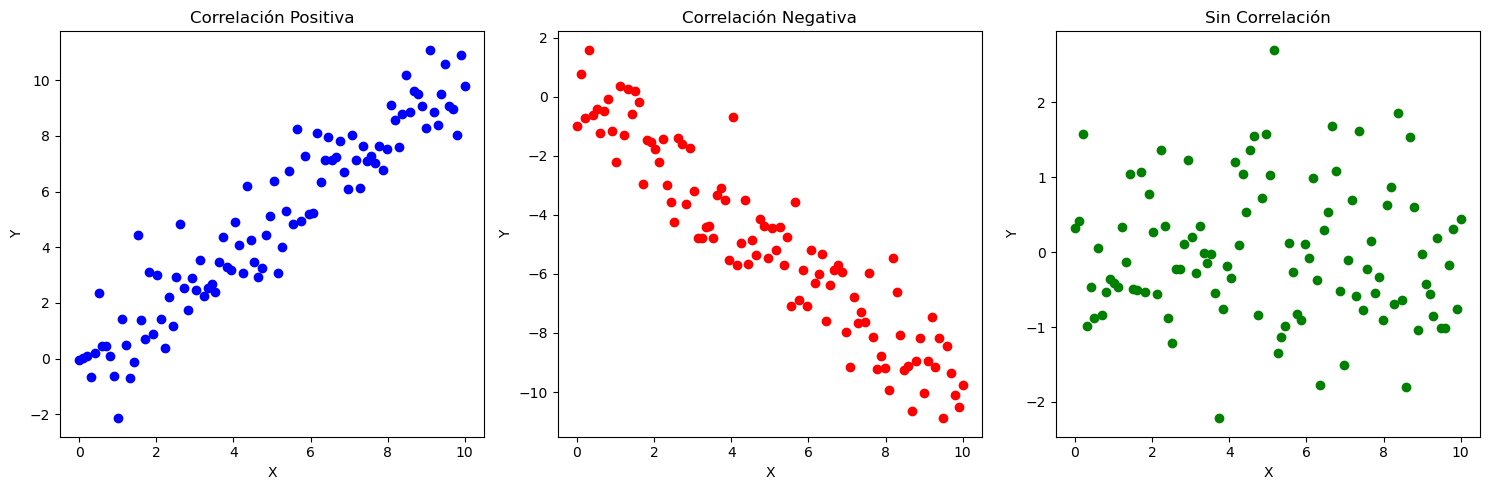

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos
x = np.linspace(0, 10, 100)

# Correlación positiva
y_positiva = x + np.random.normal(0, 1, 100)  # Añadimos ruido para que no sea una línea perfecta

# Correlación negativa
y_negativa = -x + np.random.normal(0, 1, 100)

# Sin correlación
y_sin_correlacion = np.random.normal(0, 1, 100)

# Crear gráficos
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(x, y_positiva, color='blue')
plt.title('Correlación Positiva')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 2)
plt.scatter(x, y_negativa, color='red')
plt.title('Correlación Negativa')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.scatter(x, y_sin_correlacion, color='green')
plt.title('Sin Correlación')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()


En Python, puedes calcular la correlación utilizando el método corr de pandas.

A continuación se muestra cómo se puede calcular la matriz de correlaciones para las cuatro primeras columnas del conjunto de datos del iris:

In [32]:
# Calculate correlation matrix of the first four columns of iris_df
corr_matrix = iris_df.iloc[:, 0:4].corr()
print("Correlation matrix: ")
print(corr_matrix)


Correlation matrix: 
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


Esta opción calcula e imprime la matriz de correlación de las cuatro primeras columnas del DataFrame iris. El método `corr` de pandas DataFrame calcula la correlación por pares de las columnas, excluyendo los valores NA/nulos. Por defecto, utiliza el coeficiente de correlación de Pearson.

La matriz de correlación es una matriz cuadrada que contiene los coeficientes de correlación para diferentes variables. La celda de la i-ésima fila y la j-ésima columna representa la correlación entre la i-ésima y la j-ésima variable del conjunto de datos. Los elementos diagonales de la matriz son siempre 1, ya que una variable está perfectamente correlacionada consigo misma.

## Tablas de Contingencia

- Para analizar la relación entre variables categóricas, utilizamos las **tablas de contingencia**.

- La tabla se llena con las frecuencias marginales de todos los pares de valores entre dos variables categóricas.

Veamos un ejemplo en python




In [33]:
import pandas as pd

# Sample data
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'B']
}

df = pd.DataFrame(data)

# Create a contingency table
contingency_table_1 = pd.crosstab(df['Gender'], df['Preference'])

print(contingency_table_1)


Preference  A  B
Gender          
Female      1  2
Male        2  2


In [34]:

# Sample data with 3 categorical variables
data = {
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male'],
    'Preference': ['A', 'B', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A'],
    'Region': ['North', 'South', 'East', 'North', 'West', 'South', 'East', 'West', 'North', 'South']
}

df = pd.DataFrame(data)

# Create a multi-level contingency table
contingency_table_2 = pd.crosstab([df['Gender'], df['Region']], df['Preference'])

print(contingency_table_2)


Preference     A  B
Gender Region      
Female East    0  1
       North   1  0
       South   0  1
       West    1  0
Male   East    1  0
       North   1  1
       South   1  1
       West    0  1


### Coeficiente de Cramér V


El coeficiente de Cramér V es una medida de asociación entre dos variables categóricas. Proporciona un número entre 0 y 1 que indica la fuerza de la relación, donde 0 indica ninguna relación y 1 indica una relación perfecta. Es una extensión de la prueba chi-cuadrado y se basa en el valor chi-cuadrado obtenido de la prueba.

El coeficiente de Cramér V se define como:

$$ V = \sqrt{\frac{\chi^2}{n \times \text{min}(k-1, r-1)} } $$

Donde:

- $ \chi^2 $ es el valor chi-cuadrado de la prueba.
- $ n $ es el número total de observaciones.
- $ k $ es el número de categorías en la variable 1.
- $ r $ es el número de categorías en la variable 2.

### Interpretación:

El valor de $V$ indica la fuerza de la asociación entre las dos variables categóricas:

- $ V = 0 $: No hay relación.
- $ V = 1 $: Relación perfecta.

Los valores intermedios de $V$ indican asociaciones de fuerza intermedia. Es importante notar que el coeficiente de Cramér V no indica la dirección de la relación, solo su fuerza.



Aquí hay un ejemplo de cómo calcularlo usando Python después de realizar una prueba chi-cuadrado:


In [36]:
from scipy.stats import chi2_contingency
import numpy as np

# Suponiendo tabla_contingencia del ejemplo anterior:
chi2, p, _, _ = chi2_contingency(contingency_table_1)

n = contingency_table_1.sum().sum()
min_dim = min(contingency_table_1.shape)-1  # mínimo valor entre número de filas y columnas, menos 1

cramer_v = np.sqrt(chi2 / (n * min_dim))
print(f"Cramer's V: {cramer_v}")

Cramer's V: 0.0



Este coeficiente puede ser particularmente útil cuando se quiere cuantificar la fuerza de la relación entre dos variables categóricas, especialmente cuando hay más de dos categorías en al menos una de las variables.

### Asimetría y Curtosis

Existen otras dos estadísticas resumidas que se centran en propiedades más complejas de la distribución de los datos llamadas asimetría y curtosis.

- La asimetría es una medida de la **asimetría** de la distribución de probabilidad.
  $$\text{asimetría}(x) = \frac{\sum_{i=1}^{n}(x_i-\overline{x})^3}{(n-1)sd(x)^3}$$

- Indica cuánto se desvía nuestra distribución subyacente de la distribución normal, ya que esta última tiene una asimetría de 0.

- Generalmente, tenemos tres tipos de asimetría:

    - Asimetría positiva: la cola de la distribución se extiende hacia la derecha (la media es mayor que la mediana).
    - Asimetría negativa: la cola de la distribución se extiende hacia la izquierda (la media es menor que la mediana).
    - Simétrica: la cola de la distribución se extiende hacia ambos lados (la media es igual a la mediana). 

![Fuente: Wikipedia](../images/skewness.png)




### Curtosis

- La curtosis describe la "cola" de una distribución.

  $$\text{curtosis}(x) = \frac{\sum_{i=1}^{n}(x_i-\overline{x})^4}{(n-1)sd(x)^4}$$

- Veamos los tres tipos principales de curtosis.


![Fuente: tutorialspoints](../images/kurtosis.jpg)





- En Python, podemos calcular la curtosis con La función kurt() de pandas. Sin embargo, es importante mencionar que pandas utiliza la definición "exceso de curtosis", que es la curtosis menos 3.

Tomando, pues, la distribución normal como referencia, una distribución puede ser:

- Leptocúrtica, cuando g2>0: distribución con colas más gruesas que la normal.

- Platicúrtica, cuando g2<0: distribución con colas menos gruesas que la normal.

- Mesocúrtica, cuando g2=0: cuando tiene una distribución normal (o su misma curtosis).


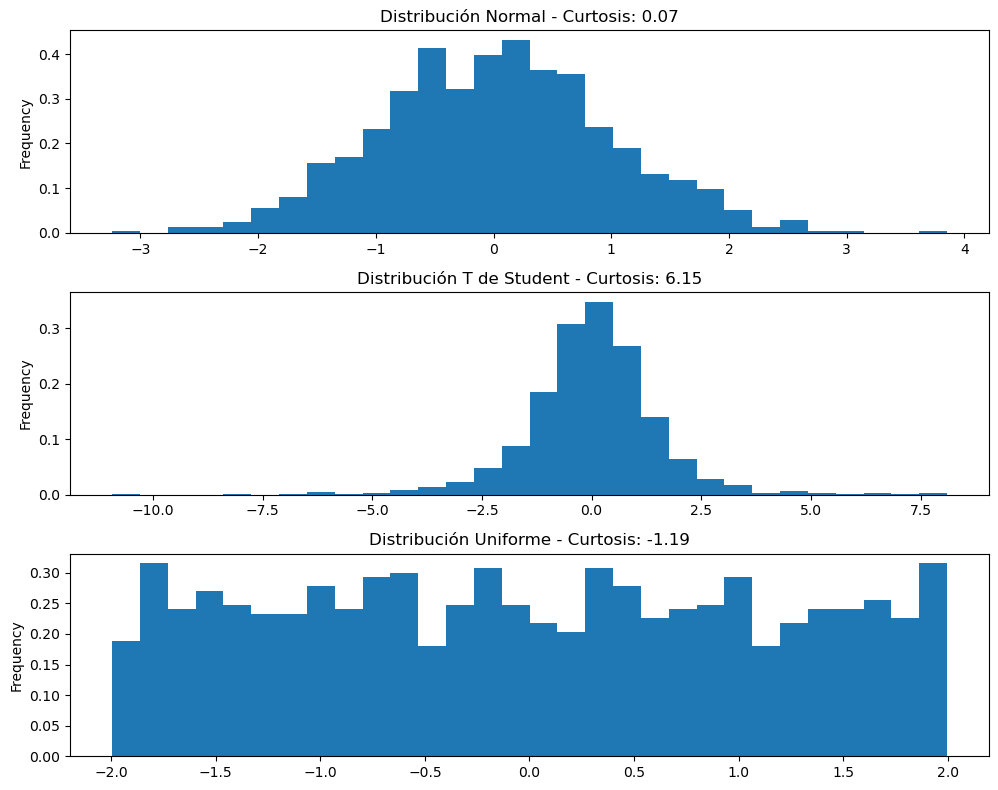

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Establecer una semilla para la reproducibilidad
np.random.seed(42)

# Generar las distribuciones
normal_data = np.random.randn(1000)
t_student_data = np.random.standard_t(df=3, size=1000)
uniform_data = np.random.uniform(-2, 2, 1000)

# Convertir los datos a DataFrames de pandas
df_normal = pd.DataFrame(normal_data, columns=['Normal'])
df_t_student = pd.DataFrame(t_student_data, columns=['T-Student'])
df_uniform = pd.DataFrame(uniform_data, columns=['Uniform'])

# Calcular curtosis
curtosis_normal = df_normal['Normal'].kurt()
curtosis_t_student = df_t_student['T-Student'].kurt()
curtosis_uniform = df_uniform['Uniform'].kurt()

# Mostrar las distribuciones y sus curtosis
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

df_normal.plot(kind='hist', ax=ax[0], legend=False, bins=30, density=True)
ax[0].set_title(f"Distribución Normal - Curtosis: {curtosis_normal:.2f}")

df_t_student.plot(kind='hist', ax=ax[1], legend=False, bins=30, density=True)
ax[1].set_title(f"Distribución T de Student - Curtosis: {curtosis_t_student:.2f}")

df_uniform.plot(kind='hist', ax=ax[2], legend=False, bins=30, density=True)
ax[2].set_title(f"Distribución Uniforme - Curtosis: {curtosis_uniform:.2f}")

plt.tight_layout()
plt.show()
